### Importing Data
1. Effect of filters

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

from skimage.data import camera    
# You can use any other input image as well
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage import feature

from google.colab.patches import cv2_imshow

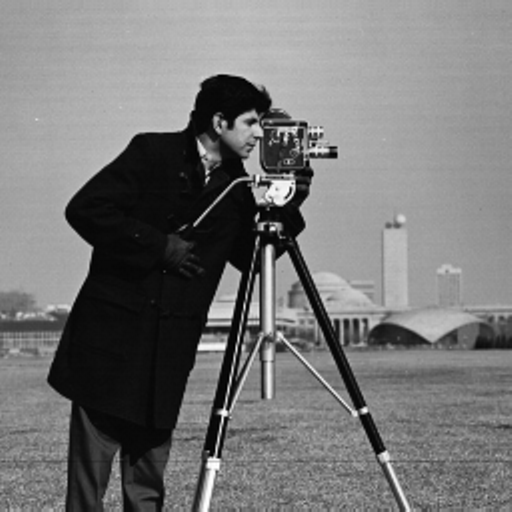

In [ ]:
img = camera()
cv2_imshow(img)

In [ ]:
# Filtering the images

img_robert = roberts(img)
img_sobel = sobel(img)
img_scharr = feature.canny(img)
img_prewitt = prewitt(img)

In [ ]:
# Defining an array

img_names = [img_robert, img_sobel, img_scharr, img_prewitt]
img_names

[array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00620054, 0.00999808, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00876889, 0.00784314, ..., 0.00277297, 0.        ,
         0.        ],
        ...,
        [0.        , 0.01176471, 0.        , ..., 0.03137255, 0.00784314,
         0.        ],
        [0.        , 0.01176471, 0.        , ..., 0.03137255, 0.00784314,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 5.71661950e-03, 7.90417426e-03, ...,
         1.96078431e-03, 1.96261557e-17, 0.00000000e+00],
        [0.00000000e+00, 4.90196078e-03, 1.00937550e-02, ...,
         4.99903874e-03, 9.80392157e-04, 0.00000000e+00],
        ...,
        [0.00000000e+00, 2.01159652e


---------- img_robert ----------



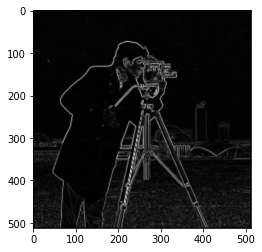


---------- img_sobel ----------



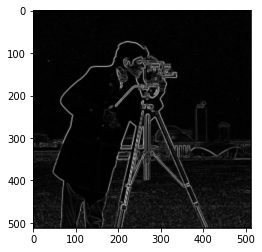


---------- img_scharr ----------



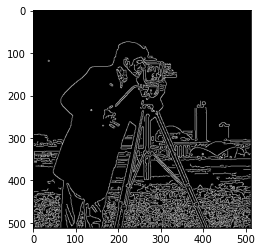


---------- img_prewitt ----------



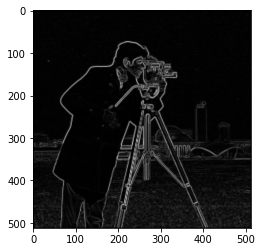

In [ ]:
# Displaying the images
names = ['img_robert', 'img_sobel', 'img_scharr', 'img_prewitt']

index = 0
for i in img_names:
  print("\n----------",names[index],"----------\n")
  plt.imshow(i, cmap='gray')
  plt.pause(0.2)
  index += 1

### Edge Detection

2. a. Laplacian Filter 

In [ ]:
# Padding the image
img_padded = cv.copyMakeBorder(img, 1, 1, 1, 1, cv.BORDER_CONSTANT)

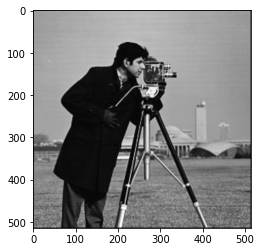

In [ ]:
plt.imshow(img_padded, cmap='gray')

In [ ]:
img_padded.shape

(514, 514)

**Making the Filter**

In [ ]:
# NxN Filter
def spatial_filter(filter_size, img):
  # Obtain number of rows and columns  
  # of the image 
  m, n = img.shape 
    
  # Develop Averaging filter(3, 3) mask 
  laplace_kernel = np.array( [[1,1,1],
                              [1,-8,1],
                              [1,1,1]] )
    
  img_new = np.zeros([m, n]) 
  ls = []

  sub_fact = int(np.floor(filter_size/2))

  # Convoluting over the image
  for i in range(1, m-sub_fact): 
      for j in range(1, n-sub_fact): 
          x = i-sub_fact
          temp = 0

          # Masking 
          for k in range(filter_size):
            y = j-sub_fact
            for l in range(filter_size):
              temp += img[x, y]*laplace_kernel[k, l]
              y+=1           
            x+=1
          ls.append(temp)
          img_new[i, j] = temp

  return img_new

In [ ]:
laplacian = spatial_filter(3, img_padded)

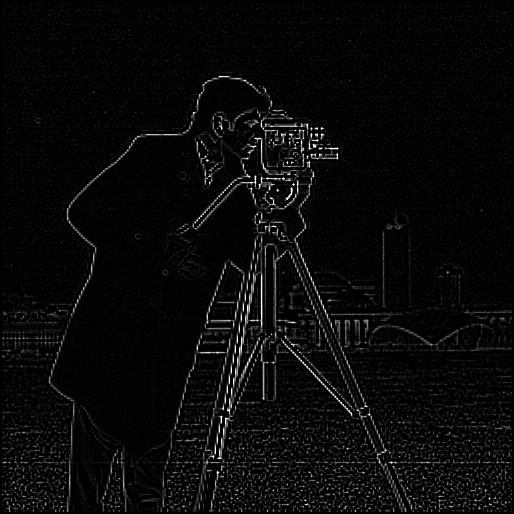

In [ ]:
cv2_imshow(laplacian)

#### Using in-built functions

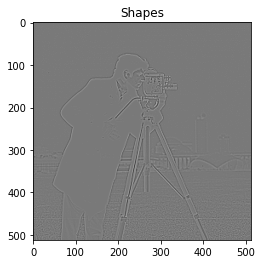

In [ ]:
# Using the Inbuilt function
# Positive Laplacian Operator
laplacian = cv.Laplacian(img, cv.CV_64F)

plt.figure()
plt.title('Shapes')
plt.imsave('shapes-lap.png', laplacian, cmap='gray', format='png')
plt.imshow(laplacian, cmap='gray')
plt.show()

2. b. Gaussian -> Laplacian = LoG

In [ ]:
from scipy.ndimage import gaussian_filter

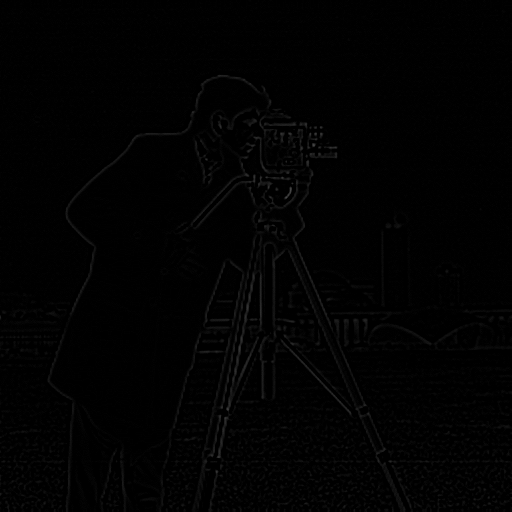

In [ ]:
gaussian = gaussian_filter(img,sigma=1)
log = cv.Laplacian(gaussian, cv.CV_64F)

cv2_imshow(log)

As we can see, it **reduces the noise** but also softens some of the edges too much, to the point that some of them are not distinguishable.

### Combining Filters

*   Read an input image (grayscale) - (a)

*   Laplacian of (a) - (b)

*   Add a) and b). By this, sharpened image will be obtained - (c)

*   Sobel of (a) - (d)

*   Sobel image smoothed with a 5*5 averaging filter - (e)

*   Mask image formed by the product of (c) and (e) - (f)

*   Sharpened image obtained by the sum of (a) and (f) - (g)



In [17]:
# Reading the image
a = img.copy()

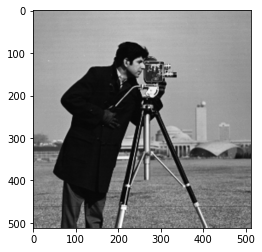

In [19]:
plt.imshow(a, cmap='gray')

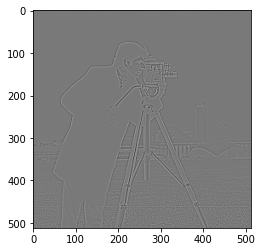

In [20]:
# Defining b
b = cv.Laplacian(a, cv.CV_64F)
plt.imshow(b, cmap='gray')

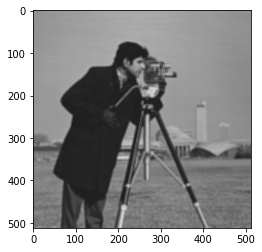

In [21]:
# Adding a and b
c = a+b
plt.imshow(c, cmap='gray')

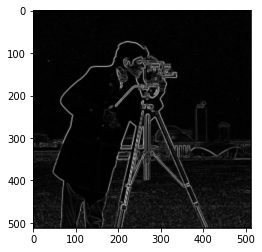

In [22]:
# Defining the sobel 
d = sobel(a)
plt.imshow(d, cmap='gray')

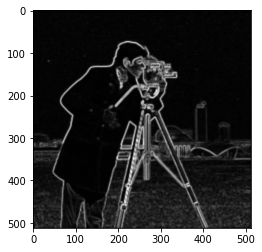

In [23]:
# Smoothing/BLurring
e = cv.GaussianBlur(d, (5,5), 0)
plt.imshow(e, cmap='gray')

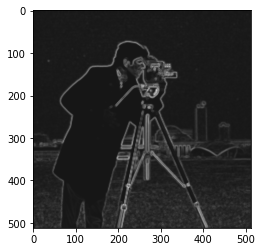

In [25]:
# Masking image formed from c*e
f = c*e
plt.imshow(f, cmap='gray')

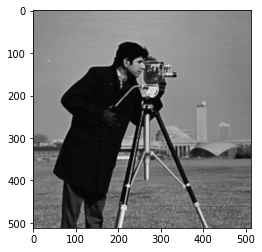

In [31]:
# Final image
g = a+f

# cv2_imshow(g)
# To reduce size
plt.imshow(g, cmap='gray')